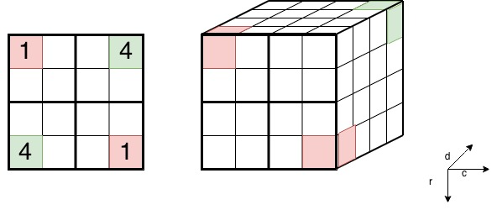
# sudoku-ai-tutorial
An educational project designed to teach beginners the fundamentals of tensors, logits, normalization, loss functions, and optimizers through a hands-on neural Sudoku example. Ideal for learners entering machine learning, PyTorch, and gradient-based reasoning

# Introduction 
This course aims to explain how a Sudoku puzzle can also be solved with an optimizer approach. We will use therefore Tensor operations to define the needed loss functions for the optimizer.

## The 4x4 Sudoku problem 
A Sudoku puzzle is solved if we have in every row numbers 1,2,3,4 and if we have in every column numbers 1,2,3,4. Additionally the 4 blocks need to contain also numbers 1,2,3,4. 
Mathematically this is expressed as follows

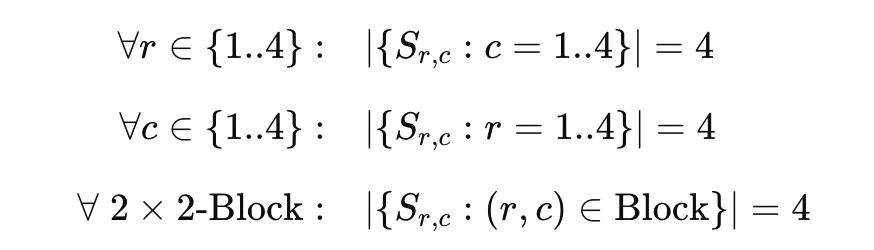

## The 4x4 Sudoku Puzzle
Let’s assume we have a Sudoku puzzle where only 4 numbers are given. We can put all givens with its values in a matrix as shown below

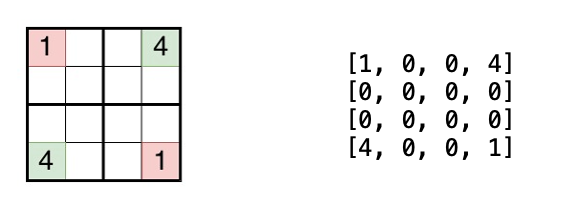

## The 4x4 Sudoku Tensors
Sudoku Puzzle as Tensor 
Since we have created a matrix which represents our puzzle with the given number we need to define the matrix and the givens in tensors due to pytorch manipulation is done with tensors.
Due to tensor indices start with 0 we need to subtract 1 because our number from the puzzle are between 1..4 which represents tensor indices 0..3
Table below shows the Sudoku puzzle, the Sudoku Tensor and the logical Givens

| Step | Description | Image |
|------|-------------|--------|
| 1 | Input Sudoku |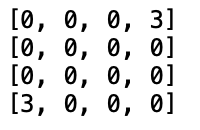 |
| 2 | Input Sudoku Tensor |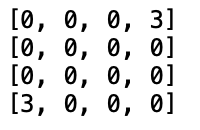|
| 3 | Input Givens |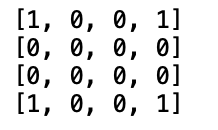 |

In [9]:
import torch
import torch.nn.functional as F

def print_matrix(string, mat):
    print(string)
    for r in mat:
        print(r)

# ---------- Solver ----------
def solve_sudoku(puzzle, max_steps=4000, lr=0.2, temperature_init=2.5, temperature_final=0.7, print_every=200):
    """
    puzzle: 4x4 list of ints in 0..4 (0 = empty; 1..4 are clues)
    Returns: solved 4x4 tensor of ints in 1..4 (or best found)
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Cuda available", torch.cuda.is_available())

    # Tensors
    givens = torch.tensor(puzzle, dtype=torch.long, device=device)  # 0..4
    givens_mask = (givens > 0)
    # targets 0..3 for CE
    givens_target = torch.where(givens_mask, givens - 1, torch.zeros_like(givens))
    print_matrix("Givens_Target", givens_target.tolist())
    print_matrix("Givens_Mask", givens_mask.tolist())

     # Optimizable logits per cell & digit
    Z = torch.zeros(4, 4, 4, device=device, requires_grad=True)
    
    # Seed logits with givens to help convergence
    with torch.no_grad():
        for i in range(4):
            for j in range(4):
                if givens_mask[i, j]:
                    Z[i, j, :] = -5.0
                    Z[i, j, givens_target[i, j]] = 5.0
                else:
                    Z[i, j, :] = torch.randn(4, device=device) * 0.01
        print("Z", Z)
    
    

# 0 = empty. Example (moderate) puzzle:
puzzle = [
    [1,0,0,4],
    [0,0,0,0],
    [0,0,0,0],
    [4,0,0,1],

]

print_matrix("Puzzle_Matrix", puzzle)

solve_sudoku(puzzle, max_steps=4000, lr=0.2, temperature_init=2.5, temperature_final=0.7, print_every=200)

Puzzle_Matrix
[1, 0, 0, 4]
[0, 0, 0, 0]
[0, 0, 0, 0]
[4, 0, 0, 1]
Cuda available True
Givens_Target
[0, 0, 0, 3]
[0, 0, 0, 0]
[0, 0, 0, 0]
[3, 0, 0, 0]
Givens_Mask
[True, False, False, True]
[False, False, False, False]
[False, False, False, False]
[True, False, False, True]
Z tensor([[[ 5.0000e+00, -5.0000e+00, -5.0000e+00, -5.0000e+00],
         [-1.3040e-02,  1.8002e-02, -9.6084e-03, -7.6082e-03],
         [-4.5708e-03, -3.3607e-03,  1.2806e-02,  1.3127e-02],
         [-5.0000e+00, -5.0000e+00, -5.0000e+00,  5.0000e+00]],

        [[-5.5637e-03, -2.5022e-02, -2.4962e-03, -3.9005e-03],
         [ 6.9643e-03, -5.9727e-04, -1.3797e-02, -6.2665e-03],
         [-1.8042e-03, -7.1542e-03,  3.4858e-04, -7.9982e-03],
         [-7.3971e-03,  1.2813e-02,  2.1382e-02, -9.0947e-03]],

        [[-1.2961e-02, -5.5273e-03,  5.4326e-03,  2.0289e-03],
         [ 5.5555e-03,  4.1907e-03, -5.3189e-03, -3.5013e-03],
         [ 5.5765e-03, -4.8395e-03, -5.7214e-03, -9.6184e-03],
         [ 1.0478e-04, -7